In [32]:
import pandas as pd
import numpy as np
from obspy.clients.fdsn import Client
from pnwstore.mseed import WaveformClient
from datetime import datetime
import obspy
from matplotlib import pyplot as plt

In [3]:

# Read Morton's catalog
events_morton = pd.read_csv('ds01.csv')

In [6]:
# Convert the TSTRING to datetime
events_morton['datetime'] = pd.to_datetime(events_morton['TSTRING'], format='%Y%m%d%H%M%S', utc=True)

In [7]:
t1 = pd.Timestamp('2012-10-14 00:00:00.000000+0000', tz='UTC')
t2 = pd.Timestamp('2012-10-14 23:59:59.999999+0000', tz='UTC')

events_morton_2021014= events_morton.loc[(events_morton['datetime'] > t1) & (events_morton['datetime'] < t2) ]

In [60]:
events_morton_2021014

,CI YEAR,TSTRING,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,LAT,LON,...,dist to nearest stn,tt RMS,ERH,ERZ,STRIKE,DIP,RAKE,PLATE DESIGNATION,TEMPLATE EVENT?,datetime
671,2.0,2.012101e+13,2012.0,10.0,14.0,2.0,39.0,44.31,40.2517,-124.4555,...,4.7,0.25,0.9,1.6,NaN,NaN,NaN,Seaward of Trench,NaN,2012-10-14 02:39:44+00:00
672,2.0,2.012101e+13,2012.0,10.0,14.0,3.0,8.0,1.10,40.7087,-124.1907,...,18.2,0.24,1.0,1.6,NaN,NaN,NaN,Slab,NaN,2012-10-14 03:08:01+00:00
673,2.0,2.012101e+13,2012.0,10.0,14.0,16.0,48.0,33.63,40.3390,-124.6048,...,13.2,0.07,5.4,12.3,NaN,NaN,NaN,Undef,NaN,2012-10-14 16:48:33+00:00


In [61]:
# Load all the pick assignments 
mycatalog = pd.read_csv('all_pick_assignments.csv')
# Convert the time series in all_pick_assignments to datetime
mycatalog['datetime'] = pd.to_datetime(mycatalog['time'], utc = True)
# Print the first five rows of the catalog
mycatalog.head()

,Unnamed: 0,idx,time,x,y,z,picks,latitude,longitude,depth,event_idx,pick_idx,residual,station,phase,time_pick,datetime
0,0,0,2012-10-14 01:24:03.676530+00:00,-99.823478,8.014299,24.609375,4,41.815873,-125.951392,24.609375,0,283,-0.006772,G19B,P,1.350178e+09,2012-10-14 01:24:03.676530+00:00
1,1,0,2012-10-14 01:24:03.676530+00:00,-99.823478,8.014299,24.609375,4,41.815873,-125.951392,24.609375,0,843,0.125995,G27B,P,1.350178e+09,2012-10-14 01:24:03.676530+00:00
2,2,0,2012-10-14 01:24:03.676530+00:00,-99.823478,8.014299,24.609375,4,41.815873,-125.951392,24.609375,0,1053,-0.261009,M12B,P,1.350178e+09,2012-10-14 01:24:03.676530+00:00
3,3,0,2012-10-14 01:24:03.676530+00:00,-99.823478,8.014299,24.609375,4,41.815873,-125.951392,24.609375,0,1938,0.141786,M12B,S,1.350178e+09,2012-10-14 01:24:03.676530+00:00
4,4,1,2012-10-14 02:39:44.924554+00:00,26.269336,-128.412984,40.234375,5,40.593306,-124.439672,40.234375,1,12,0.377781,FS09B,P,1.350182e+09,2012-10-14 02:39:44.924554+00:00


In [69]:
t1 = events_morton_2021014.iloc[0]['datetime']
event_morton_2021014_023944 = mycatalog.loc[(mycatalog['datetime'] > t1 - pd.Timedelta(5,'minutes')) & (mycatalog['datetime'] < t1 +pd.Timedelta(5,'minutes')) ]

t2 = events_morton_2021014.iloc[1]['datetime']
event_morton_2021014_030801 = mycatalog.loc[(mycatalog['datetime'] > t2 - pd.Timedelta(5,'minutes')) & (mycatalog['datetime'] < t2 +pd.Timedelta(5,'minutes')) ]

t3 = events_morton_2021014.iloc[2]['datetime']
event_morton_2021014_164833 = mycatalog.loc[(mycatalog['datetime'] > t3 - pd.Timedelta(5,'minutes')) & (mycatalog['datetime'] < t3 +pd.Timedelta(5,'minutes')) ]

In [70]:
event_morton_2021014_023944

,Unnamed: 0,idx,time,x,y,z,picks,latitude,longitude,depth,event_idx,pick_idx,residual,station,phase,time_pick,datetime
4,4,1,2012-10-14 02:39:44.924554+00:00,26.269336,-128.412984,40.234375,5,40.593306,-124.439672,40.234375,1,12,0.377781,FS09B,P,1.350182e+09,2012-10-14 02:39:44.924554+00:00
5,5,1,2012-10-14 02:39:44.924554+00:00,26.269336,-128.412984,40.234375,5,40.593306,-124.439672,40.234375,1,1455,-0.171493,FS09B,S,1.350182e+09,2012-10-14 02:39:44.924554+00:00
6,6,1,2012-10-14 02:39:44.924554+00:00,26.269336,-128.412984,40.234375,5,40.593306,-124.439672,40.234375,1,190,-0.436940,G10B,P,1.350182e+09,2012-10-14 02:39:44.924554+00:00
7,7,1,2012-10-14 02:39:44.924554+00:00,26.269336,-128.412984,40.234375,5,40.593306,-124.439672,40.234375,1,1597,0.220285,G10B,S,1.350182e+09,2012-10-14 02:39:44.924554+00:00
8,8,1,2012-10-14 02:39:44.924554+00:00,26.269336,-128.412984,40.234375,5,40.593306,-124.439672,40.234375,1,286,0.010367,G19B,P,1.350182e+09,2012-10-14 02:39:44.924554+00:00


In [71]:
event_morton_2021014_030801

,Unnamed: 0,idx,time,x,y,z,picks,latitude,longitude,depth,event_idx,pick_idx,residual,station,phase,time_pick,datetime
9,9,2,2012-10-14 03:08:04.522444+00:00,12.259024,-107.072404,49.609375,7,40.785806,-124.604763,49.609375,2,1456,0.293201,FS09B,S,1.350184e+09,2012-10-14 03:08:04.522444+00:00
10,10,2,2012-10-14 03:08:04.522444+00:00,12.259024,-107.072404,49.609375,7,40.785806,-124.604763,49.609375,2,192,-1.275212,G10B,P,1.350184e+09,2012-10-14 03:08:04.522444+00:00
11,11,2,2012-10-14 03:08:04.522444+00:00,12.259024,-107.072404,49.609375,7,40.785806,-124.604763,49.609375,2,1599,0.826728,G10B,S,1.350184e+09,2012-10-14 03:08:04.522444+00:00
12,12,2,2012-10-14 03:08:04.522444+00:00,12.259024,-107.072404,49.609375,7,40.785806,-124.604763,49.609375,2,288,-0.841498,G19B,P,1.350184e+09,2012-10-14 03:08:04.522444+00:00
13,13,2,2012-10-14 03:08:04.522444+00:00,12.259024,-107.072404,49.609375,7,40.785806,-124.604763,49.609375,2,1630,0.238312,G19B,S,1.350184e+09,2012-10-14 03:08:04.522444+00:00
14,14,2,2012-10-14 03:08:04.522444+00:00,12.259024,-107.072404,49.609375,7,40.785806,-124.604763,49.609375,2,1256,0.128741,M14B,P,1.350184e+09,2012-10-14 03:08:04.522444+00:00
15,15,2,2012-10-14 03:08:04.522444+00:00,12.259024,-107.072404,49.609375,7,40.785806,-124.604763,49.609375,2,2002,0.629728,M14B,S,1.350184e+09,2012-10-14 03:08:04.522444+00:00


In [72]:
event_morton_2021014_164833

,Unnamed: 0,idx,time,x,y,z,picks,latitude,longitude,depth,event_idx,pick_idx,residual,station,phase,time_pick,datetime
42,42,7,2012-10-14 16:53:05.638758+00:00,-60.127592,-121.553512,37.890625,14,40.653305,-125.46094,37.890625,7,137,-0.463175,FS09B,P,1.350234e+09,2012-10-14 16:53:05.638758+00:00
43,43,7,2012-10-14 16:53:05.638758+00:00,-60.127592,-121.553512,37.890625,14,40.653305,-125.46094,37.890625,7,1556,-0.702513,FS09B,S,1.350234e+09,2012-10-14 16:53:05.638758+00:00
44,44,7,2012-10-14 16:53:05.638758+00:00,-60.127592,-121.553512,37.890625,14,40.653305,-125.46094,37.890625,7,238,0.194385,G10B,P,1.350234e+09,2012-10-14 16:53:05.638758+00:00
45,45,7,2012-10-14 16:53:05.638758+00:00,-60.127592,-121.553512,37.890625,14,40.653305,-125.46094,37.890625,7,1617,-0.254243,G10B,S,1.350234e+09,2012-10-14 16:53:05.638758+00:00
46,46,7,2012-10-14 16:53:05.638758+00:00,-60.127592,-121.553512,37.890625,14,40.653305,-125.46094,37.890625,7,324,0.735714,G19B,P,1.350234e+09,2012-10-14 16:53:05.638758+00:00
47,47,7,2012-10-14 16:53:05.638758+00:00,-60.127592,-121.553512,37.890625,14,40.653305,-125.46094,37.890625,7,1657,0.715669,G19B,S,1.350234e+09,2012-10-14 16:53:05.638758+00:00
48,48,7,2012-10-14 16:53:05.638758+00:00,-60.127592,-121.553512,37.890625,14,40.653305,-125.46094,37.890625,7,659,0.516474,G25B,P,1.350234e+09,2012-10-14 16:53:05.638758+00:00
49,49,7,2012-10-14 16:53:05.638758+00:00,-60.127592,-121.553512,37.890625,14,40.653305,-125.46094,37.890625,7,1816,-0.353227,G25B,S,1.350234e+09,2012-10-14 16:53:05.638758+00:00
50,50,7,2012-10-14 16:53:05.638758+00:00,-60.127592,-121.553512,37.890625,14,40.653305,-125.46094,37.890625,7,904,-0.277795,G27B,P,1.350234e+09,2012-10-14 16:53:05.638758+00:00
51,51,7,2012-10-14 16:53:05.638758+00:00,-60.127592,-121.553512,37.890625,14,40.653305,-125.46094,37.890625,7,1904,-0.840728,G27B,S,1.350234e+09,2012-10-14 16:53:05.638758+00:00


In [73]:
client = WaveformClient()


In [16]:
station_list = ['FS09B',
 'FS13B',
 'FS16B',
 'FS17B',
 'FS20B',
 'G10B',
 'G17B',
 'G19B',
 'G25B',
 'G26B',
 'G27B',
 'J09B',
 'J25B',
 'J33B',
 'M09B',
 'M12B',
 'M14B']

In [29]:
starttime = obspy.UTCDateTime(mycatalog.iloc[0]['datetime'])

In [27]:
starttime

Timestamp('2012-10-14 02:39:44.924554+0000', tz='UTC')

In [75]:
events = event_morton_2021014_023944
assignments = mycatalog
for ievent, event in events.iterrows():
    picks_this_event = assignments[(assignments['event_idx'] == ievent) & (assignments['phase'] == "P")]
    picks_this_event = picks_this_event.sort_values("time")
    picks_this_event.reset_index(drop=True, inplace=True)
    
    time = pd.Timestamp.fromtimestamp(event['time'], tz='UTC')
    plt.figure(figsize=(15,10), dpi=150)
    
    for i, idx in picks_this_event.iterrows():
        s = client_waveforms.get_waveforms(network="7D", station=idx['station'], channel="?H?", 
                                           year=2012, month=10, day=14)
        
        s = s.select(channel = "[HB]H?")
        s.filter(type='bandpass',freqmin=4,freqmax=15)
        if s[0].stats.channel == 'HH1':
            s = s.resample(50)
        else:
            pass

        trim_s = s.copy().trim(starttime = UTCDateTime(time) - 10, endtime = UTCDateTime(time) + 50)
        sdata = np.array(trim_s)[:,:]
        sdata_norm = (sdata-np.min(sdata, axis=1, keepdims=True))/(np.max(sdata, axis=1, keepdims=True)-np.min(sdata, axis=1, keepdims=True))
        offsets2 = np.arange(0,len(sdata)*len(picks_this_event),len(sdata))

        for ii in range(len(sdata)):
            offsets1  = np.arange(0,len(sdata))
            plt.plot(trim_s[ii].times(type='utcdatetime'), sdata_norm[ii]+offsets1[ii]*0.5+offsets2[i], 
                     color = 'gray', alpha=0.7, lw=0.5)    
            plt.vlines(pd.Timestamp.fromtimestamp(idx['time'], tz='UTC'), 
                                    offsets1[ii]*0.5+offsets2[i]+1,
                                    offsets1[ii]*0.5+offsets2[i])


    plt.yticks(offsets2+1, picks_this_event['station'])
    plt.axvline(time,ls='-', c='r')
    plt.title(time)
#     break

TypeError: 'str' object cannot be interpreted as an integer

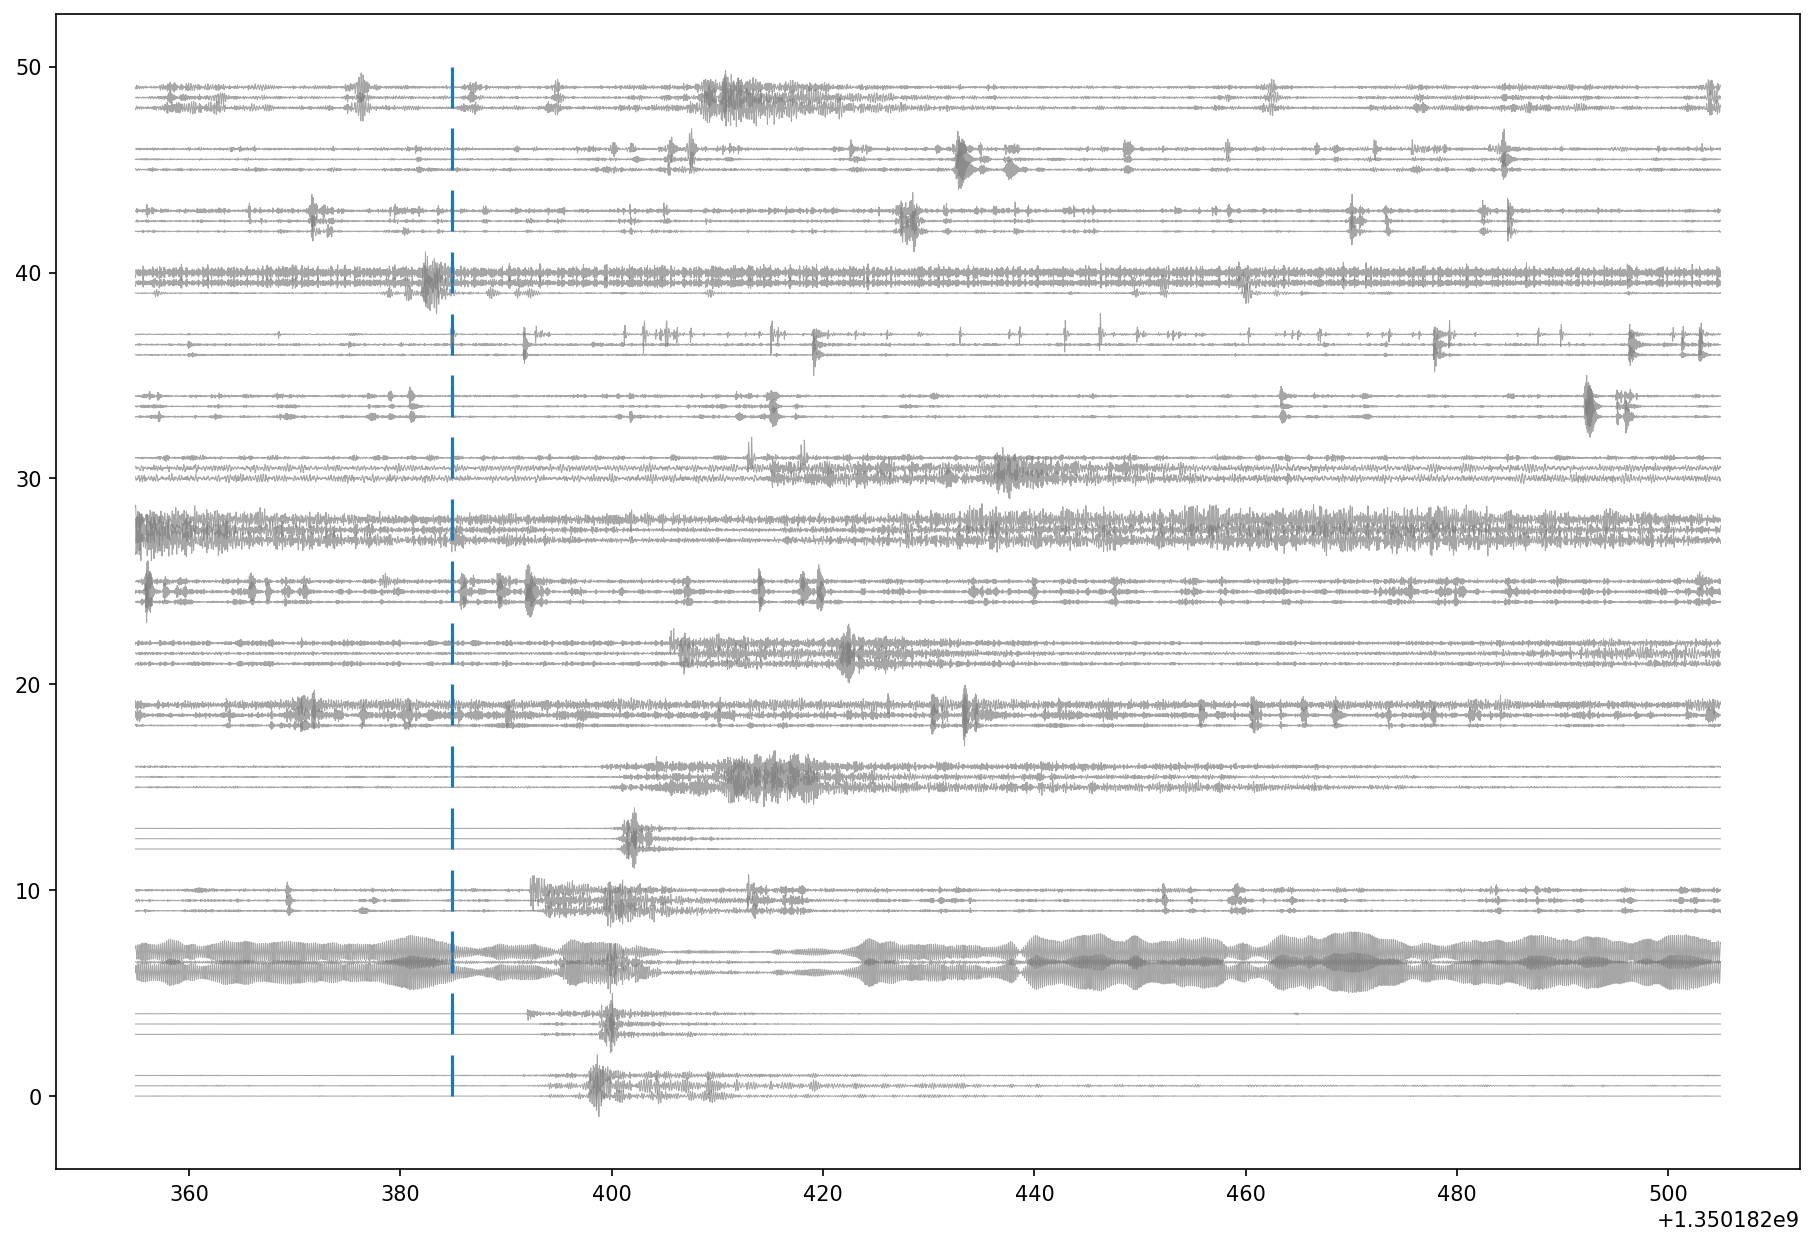

In [56]:
plt.figure(figsize=(15,10), dpi=150)
for i, sta in enumerate(station_list):
    st = client.get_waveforms(network="7D", station=sta, channel="?H?", year=2012, month=10, day=14)
    st = obspy.Stream(filter(lambda st:st.stats.sampling_rate>10, st))
    st.filter(type='bandpass',freqmin=4,freqmax=15)
    
    
    trim_st = st.copy().trim(starttime = starttime - 30, 
                endtime = starttime + 120)

    trim_st = trim_st.normalize()
    offsets1  = np.arange(0,len(trim_st))
    offsets2 = np.arange(0,len(station_list)* (len(trim_st)),len(trim_st))
    

    for ii in range(len(trim_st)):
        plt.plot(trim_st[ii].times(type='utcdatetime'), trim_st[ii].data+offsets1[ii]*0.5+offsets2[i], 
                 color = 'gray', alpha=0.7, lw=0.5)    
        plt.vlines(trim_st.peak, 
        offsets1[ii]*0.5+offsets2[i]+1,
            offsets1[ii]*0.5+offsets2[i])
    
    

In [57]:
    offsets2 = np.arange(0,len(station_list)* (len(trim_st)),len(trim_st))


In [20]:
s_J57A

6 Trace(s) in Stream:
7D.FS09B..BH1 | 2012-10-14T00:00:00.014700Z - 2012-10-14T23:59:59.994700Z | 50.0 Hz, 4320000 samples
7D.FS09B..BH2 | 2012-10-14T00:00:00.014700Z - 2012-10-14T23:59:59.994700Z | 50.0 Hz, 4320000 samples
7D.FS09B..BHZ | 2012-10-14T00:00:00.014700Z - 2012-10-14T23:59:59.994700Z | 50.0 Hz, 4320000 samples
7D.FS09B..LH1 | 2012-10-14T00:00:00.974700Z - 2012-10-14T23:59:59.974700Z | 1.0 Hz, 86400 samples
7D.FS09B..LH2 | 2012-10-14T00:00:00.974700Z - 2012-10-14T23:59:59.974700Z | 1.0 Hz, 86400 samples
7D.FS09B..LHZ | 2012-10-14T00:00:00.974700Z - 2012-10-14T23:59:59.974700Z | 1.0 Hz, 86400 samples